# Capstone Project 3 - Purwadhika
Student: Riki <br>
Program: JCDSOL-009

**Related files and links:**
1. Links
    - [Github](https://github.com/riki-profile/capstone-project3.git)
    - [Explanation video](https://drive.google.com/drive/folders/1J5OGr6LB9OxzBtofbyb96pGh1_WYXfQ5?usp=sharing)
1. Dataset : 
    - [Bank Marketing Campaign](https://drive.google.com/file/d/1POlKoWg90B7WbVmDz-Oh4CvepI4viWCY/view?usp=sharing).

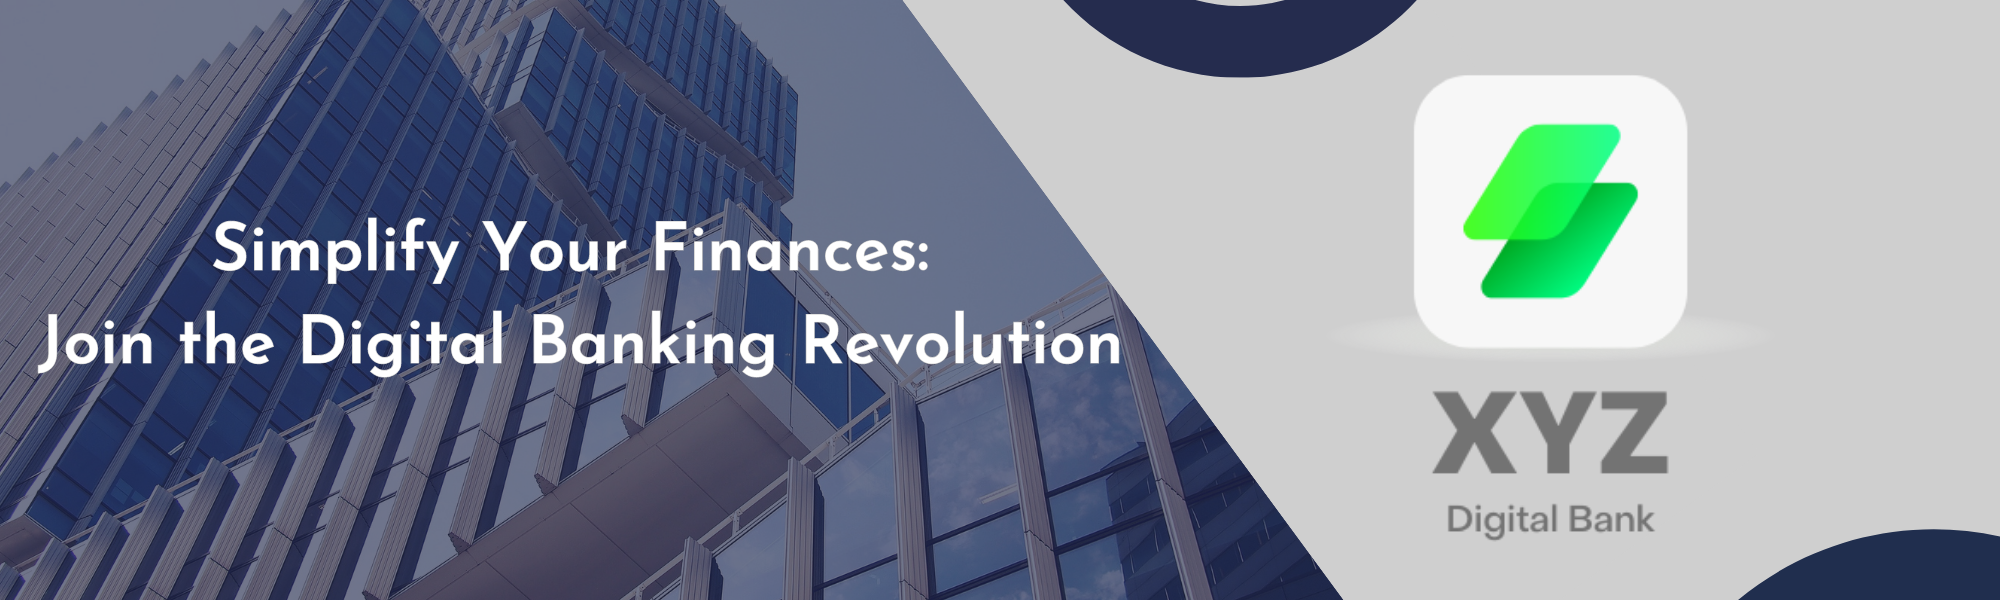

## **Introduction**

XYZ is a bank that offers a wide range of financial products to its customers. One of the well-known financial products is term deposits, which offer a fixed interest rate to the customers for a certain period of time. To attract new customers and retain existing ones, the bank conducts marketing campaigns. The purpose of these campaigns is to identify potential customers who are more likely to deposit money in the bank and target them with personalized offers.

**Problem Statement**

XYZ bank is facing stiff competition in the market and needs to increase its customer base. One of the ways to achieve this is by conducting marketing campaigns. However, these campaigns come at a cost and must be targeted to maximize their effectiveness. The bank needs to identify which customers are most likely to deposit their money into a term deposit, which can help the bank plan and execute its marketing campaigns more efficiently.

**Goal**

The goal of this analysis is to build a classification model that can accurately predict whether a customer will subscribe to a term deposit or not. This will enable the bank to identify the most promising customers for their marketing campaigns and improve their conversion rate, ultimately leading to increased revenue for the bank.

**Analytics Approach**

In order to achieve our goals, we will use a supervised classification approach. We will start by performing exploratory data analysis to gain insights into the distribution of the data, identify any outliers or missing values. We will then preprocess the data, which includes handling missing values, encoding categorical variables, scaling numerical variables, and splitting the data into training and testing sets. Next, we will train several classification models on the training data, including logistic regression, decision tree, random forest, and XGBoost. We will evaluate the performance of each model using metrics such as accuracy, precision, recall, F1 score, and ROC AUC score. Finally, we will select the best-performing model and fine-tune its hyperparameters using techniques such as grid search or random search to optimize its performance on the test data.

**Metrics Evaluation**

To evaluate the performance of our classification model, we will use several metrics, including accuracy, precision, recall, and F1-score. Accuracy measures the proportion of correct predictions among all predictions made by the model. Precision measures the proportion of true positives among all positive predictions, while recall measures the proportion of true positives among all actual positive instances in the data. F1-score is the harmonic mean of precision and recall, providing a balanced evaluation of the model's performance.

In the context of our problem, the consequence of misclassifying a customer as a potential depositor when they are not interested in a term deposit could result in wasted marketing resources and may negatively impact the bank's reputation. On the other hand, misclassifying a potential depositor as not interested in a term deposit could lead to a missed opportunity for the bank to acquire a new customer and increase their revenue. Therefore, it is important to focus on both precision and recall to achieve a balanced evaluation of the model's performance.

Potential errors that could occur in our classification model include 
- **False positives (Type I error)** : *False positives occur when the model predicts a customer as interested in a term deposit when they are not.*
- **False negatives (Type II error)** : *False negatives occur when the model predicts a customer as not interested in a term deposit when they are.* 

The consequences of each error type are different, and it is important to understand the impact of each error type on the business before making a final decision.

---
## **Data Acquisition and Preparation**

1. Library

In [ ]:
# Dataframe
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from category_encoders import BinaryEncoder

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Intrepretable
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

2. Load Dataset

In [ ]:
# Load the dataset
data = pd.read_csv("data_bank_marketing_campaign.csv")

3. Data Understanding and Cleaning

In [ ]:
# Inspect the data
data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [ ]:
# Check the shape of the data
data.shape

(7813, 11)

In [ ]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [ ]:
# Check for missing values
data.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [ ]:
# Duplicate Data
data.duplicated().sum()

8

In [ ]:
# Drop Duplicated data
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7805 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7805 non-null   int64 
 1   job       7805 non-null   object
 2   balance   7805 non-null   int64 
 3   housing   7805 non-null   object
 4   loan      7805 non-null   object
 5   contact   7805 non-null   object
 6   month     7805 non-null   object
 7   campaign  7805 non-null   int64 
 8   pdays     7805 non-null   int64 
 9   poutcome  7805 non-null   object
 10  deposit   7805 non-null   object
dtypes: int64(4), object(7)
memory usage: 731.7+ KB


In [ ]:
# Distribution of the target variable
print("In Number :\n", data['deposit'].value_counts(), 
      '\n=============\n',"In percentage :\n", 
      data['deposit'].value_counts(normalize=True))

In Number :
 no     4075
yes    3730
Name: deposit, dtype: int64 
 In percentage :
 no     0.522101
yes    0.477899
Name: deposit, dtype: float64


From the results above we can see that the distribution of the target variable is:
- Those with deposit accounts around 47.79% (3,730)
- Those who do not have a deposit account 52.21% (4.075)

From the correlation matrix we can see that there are no significantly correlated features

In [ ]:
# inconsistent or Typo Data value
# Showing Unique Value of each column
pd.set_option('display.max_colwidth', None)

listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


From the table above we can say we need conduct feature engineering process (encoding and Scaler) into the dataset to make the model performance better. We will conduct later in the feature engineering process, for now we only focus to cleaning and understanding the dataset first.

4. Visualization

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


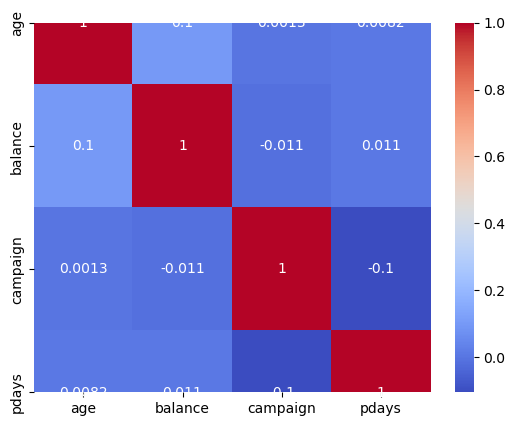

In [ ]:
# Correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the correlation matrix we can see that there are no significantly correlated features

- *Customer Profile*

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead

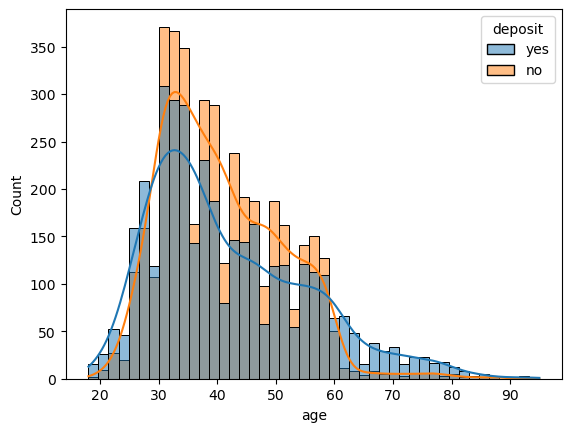

In [ ]:
# Visualize the distribution of the age feature
sns.histplot(x='age', hue='deposit', data=data, kde=True)

the age is not normally distributed, and it is difficult to see the age differences between those who have deposits and who do not have

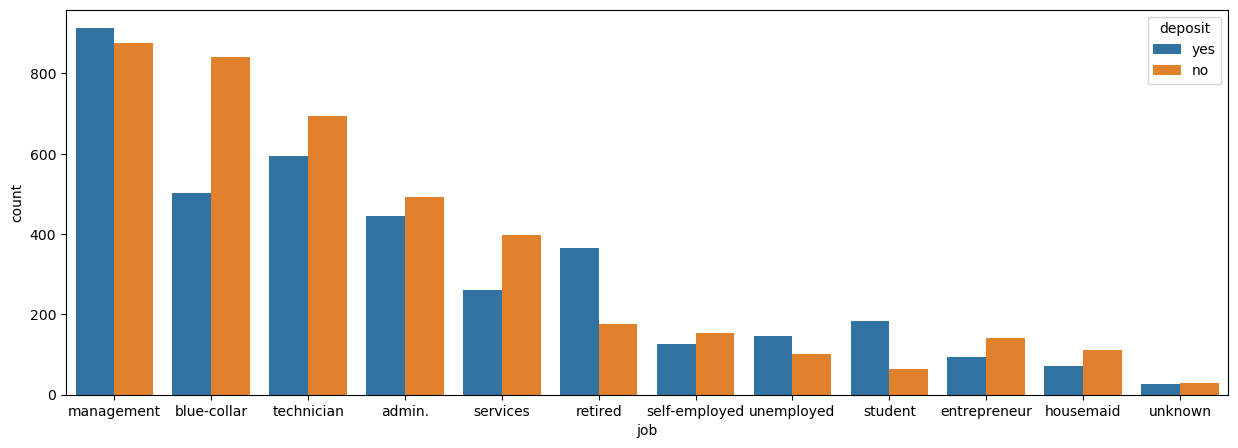

In [ ]:
# Visualize the distribution of the job feature
plt.figure(figsize=(15,5))
sns.countplot(x='job', hue='deposit', data=data, order=data['job'].value_counts().index)
plt.show()

among those 12 roles:
- Top 5 roles that have deposits are management, technician, blue-collar, admin and retired
- Bottom 5 roles are student, unemployed, entreprenuer, housemaid, and unknown

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead

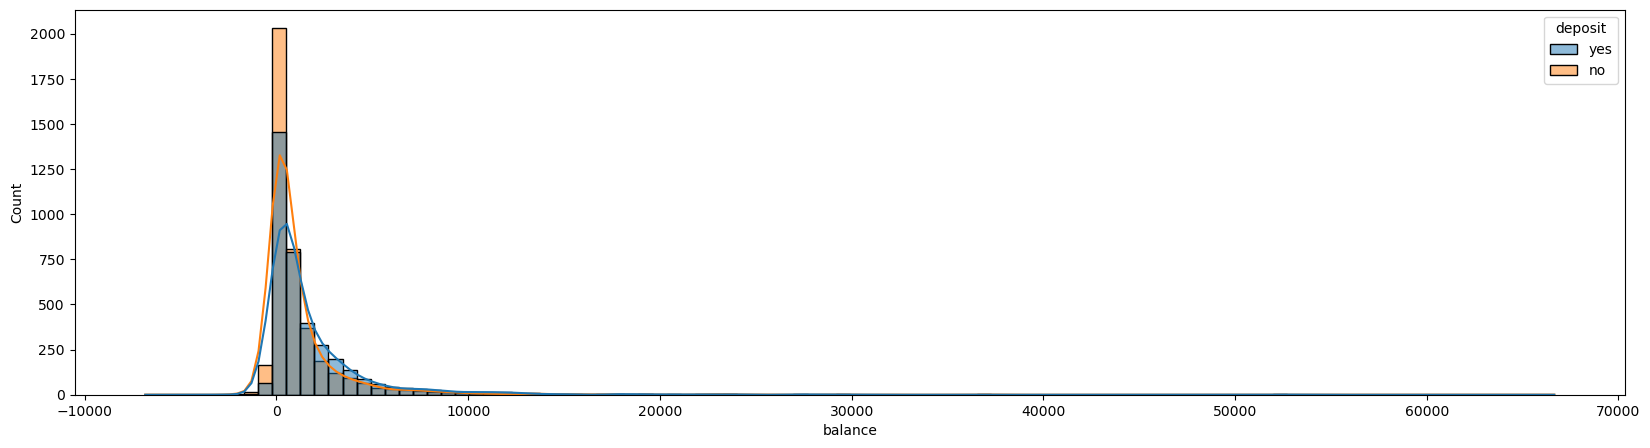

In [ ]:
# Visualize the distribution of the balance feature
plt.figure(figsize=(20,5))
sns.histplot(x='balance', hue='deposit', bins=100, data=data, kde=True)
plt.show()

- The data is not normally distributed
- It is right-skewed
- Hard to tell and gain insight from this visualization

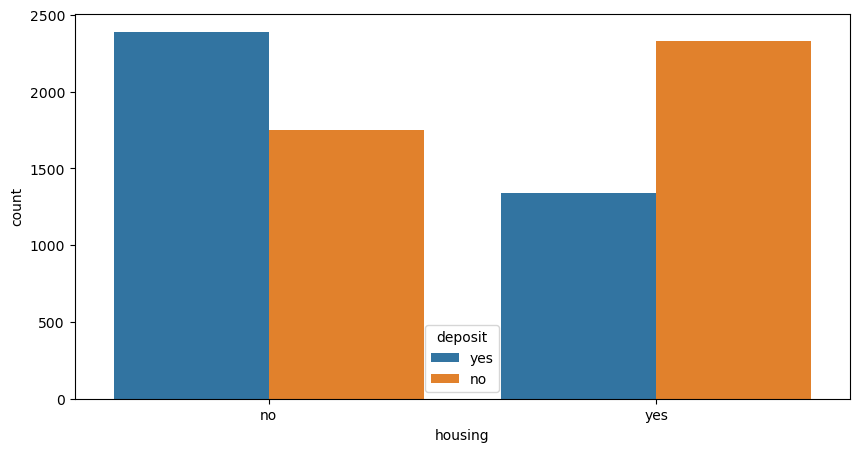

In [ ]:
# Visualize the distribution of the housing feature
plt.figure(figsize=(10,5))
sns.countplot(x='housing', hue='deposit', data=data, order=data['housing'].value_counts().index)
plt.show()

- majority of the respondent do not have house
- Those who don't own a house actually have more deposits than those who do.

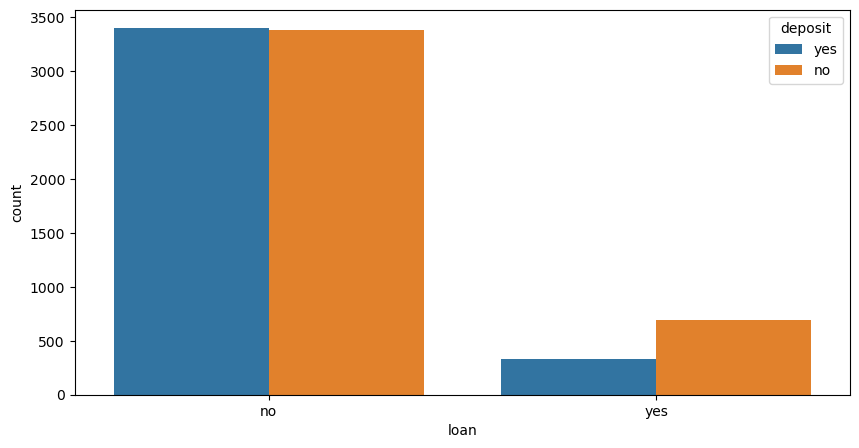

In [ ]:
# Visualize the distribution of the loan feature
plt.figure(figsize=(10,5))
sns.countplot(x='loan', hue='deposit', data=data, order=data['loan'].value_counts().index)
plt.show()

- The respondents are dominated by those who do not have loan
- Those who do not have loans, have distributions that have slightly higher deposits than those who do not have deposits.

- *Marketing Data*

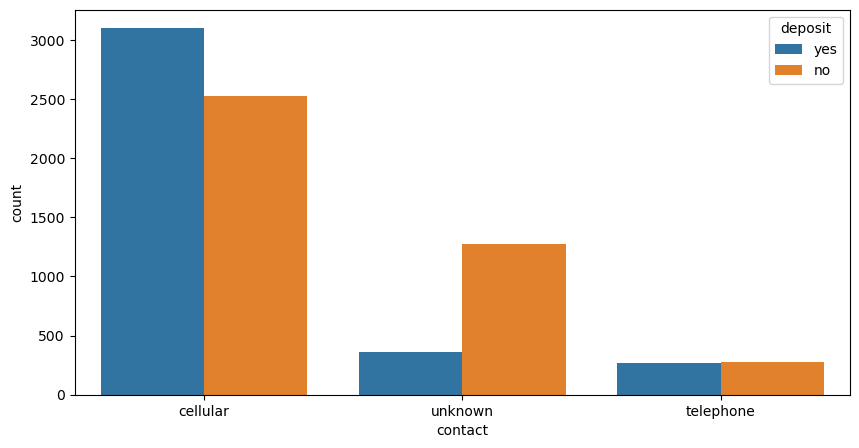

In [ ]:
# Visualize the distribution of the contact feature
plt.figure(figsize=(10,5))
sns.countplot(x='contact', hue='deposit', data=data, order=data['contact'].value_counts().index)
plt.show()

- The contact method that dominated depositors are via cellular

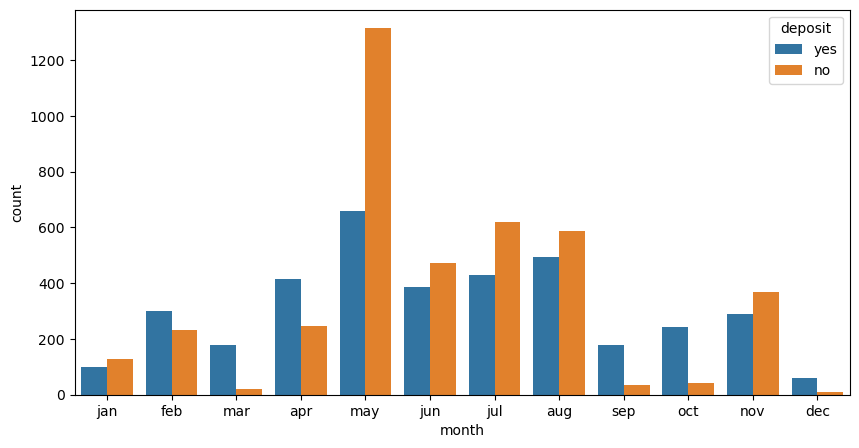

In [ ]:
# Visualize the distribution of the month feature
plt.figure(figsize=(10,5))
sns.countplot(x='month', hue='deposit', data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                          'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.show()

- from the visualization above, we could see that the trends is rising around Q2 and Q4 (apr - aug)
- The lowest period is between the end and the beginning of the year (dec-jan)

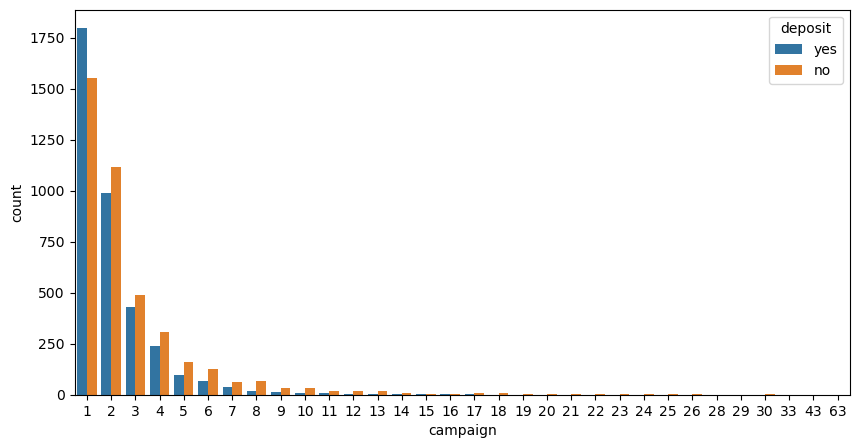

In [ ]:
# Visualize the distribution of the campaign feature
plt.figure(figsize=(10,5))
sns.countplot(x='campaign', hue='deposit', data=data )
plt.show()

- The higher campaign is done, the lower is depositors that the bank get

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead

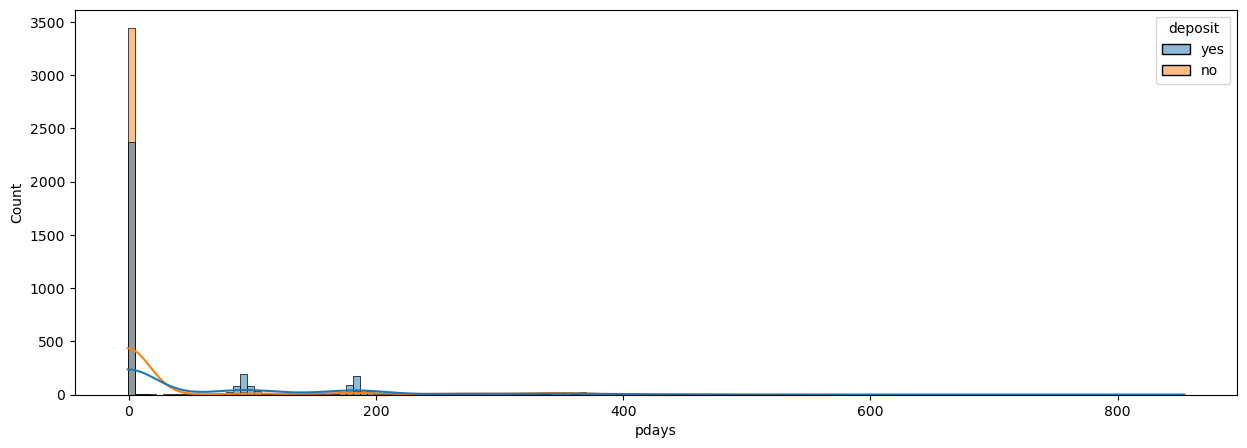

In [ ]:
# Visualize the distribution of the pdays feature
plt.figure(figsize=(15,5))
sns.histplot(x='pdays', hue='deposit', data=data, bins=150, kde=True)
plt.show()

- Since there is a lot of data, it is hard to tell the trend and gain insight from the `pdays feature`

## **Preprocessing**

1. Feature Engineering

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


| Method/Treatment | Feature/Column Name |
|------------------|---------------------|
| Binary Encoding  | month, job          |
| One-Hot Encoding | deposit, contact, loan, poutcome, housing |


In [ ]:
# Binary Preparation
binary_col = ['job','month']
binary_Encoder = BinaryEncoder()

# OneHot Preparation
oneHot_col = ['housing','loan', 'contact', 'poutcome']
oneHot_Encoder = OneHotEncoder(drop='first')

# Target Encoding Preparation
target_col = {'deposit': ['no', 'yes']}
target_Encoder = OneHotEncoder(categories=target_col)

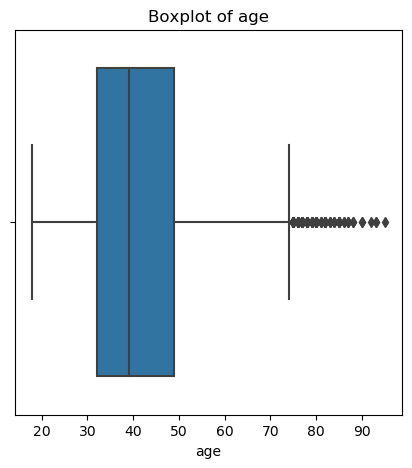

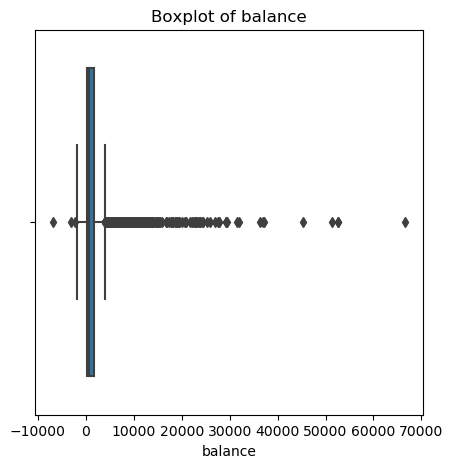

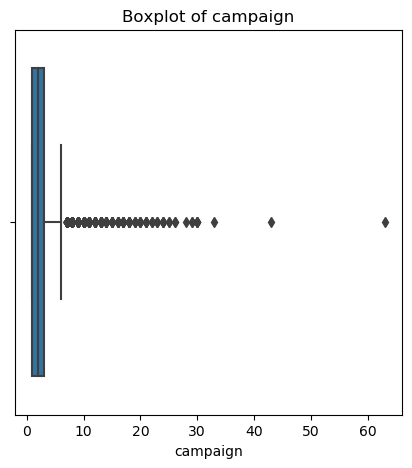

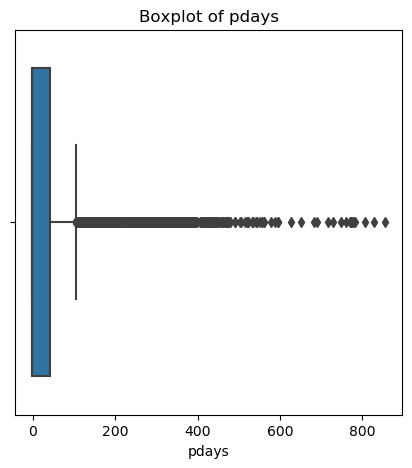

In [ ]:
# See the outliers of numberical columns
numerical_columns = ['age', 'balance', 'campaign', 'pdays']

for column in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

After examining the plots and summary statistics, consider the following:

- If the features are normally distributed and there are no extreme outliers, you can use StandardScaler.
- If the features have a skewed distribution, contain extreme values, or you want to preserve the non-Gaussian distribution, you can use MinMaxScaler.

So for next step we will using `MinMaxScaler()`

In [ ]:
# Scaler Preparation
scaler_col = ['age', 'balance', 'campaign', 'pdays']
minMax_Scaler = MinMaxScaler()

In [ ]:
# Pipeline for The Feature Engineering
transformer = ColumnTransformer([
    ('Binary', binary_Encoder, binary_col),
    ('One Hot', oneHot_Encoder, oneHot_col),
    ('Numerical Encoding', minMax_Scaler, scaler_col)
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Binary', BinaryEncoder(), ['job', 'month']),
                                ('One Hot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('Numerical Encoding', MinMaxScaler(),
                                 ['age', 'balance', 'campaign', 'pdays'])])

2. Data Splitting

In [ ]:
x = data.drop(columns=['deposit'])
y = np.where(data['deposit']=='yes',1,0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    random_state=101
)

3. Testing the transformer pipeline

In [ ]:
test_transformer = transformer.fit_transform(x_train)

In [ ]:
# Extract Columns name

# Binary Columns Name
bin_cols = transformer.named_transformers_['Binary'].get_feature_names_out()

# OneHot Columns Name
ohe_cols = transformer.named_transformers_['One Hot'].get_feature_names_out()

# Scaler Name
scaler_cols = transformer.named_transformers_['Numerical Encoding'].get_feature_names_out()

cols = list(bin_cols) + list(ohe_cols) + list(scaler_col)

In [ ]:
testing_df = pd.DataFrame(data=test_transformer, columns=cols)
testing_df.head(3)

,job_0,job_1,job_2,job_3,month_0,month_1,month_2,month_3,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,age,balance,campaign,pdays
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.337662,0.083904,0.000000,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.389610,0.043867,0.071429,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.181818,0.043852,0.000000,0.0


## **Model Building & Selection**

1. Building the models (Benchmark)

we will try one model first as a benchmark. In the context of term deposit prediction, we will using *the ROC-AUC score* as the evaluation metric. Since it helps assess the model's ability to correctly identify customers who are likely to subscribe to a term deposit while minimizing false positive predictions (identifying customers as subscribers when they are not). 

In [ ]:
# Define the model
logreg = LogisticRegression()

# Cross-Validation Method
skfold = StratifiedKFold(n_splits=5)

# Pipeline
estimator = Pipeline([
        ('preprocess', transformer),
        ('model', logreg)])
    
model_cv = cross_val_score(estimator, x_train, y_train, cv= skfold, scoring='roc_auc')

print("Score", model_cv)
print('Average', model_cv.mean())
print('Standard Deviation', model_cv.std())

Score [0.75742163 0.72103694 0.75728606 0.74645366 0.7418145 ]
Average 0.7448025589007999
Standard Deviation 0.013353187953408905


In [ ]:
# Test More Model
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg, knn, dt, rf, xgb, lgbm]

In [ ]:
score = []
mean = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    
    model_cv = cross_val_score(estimator, x_train, y_train, cv= skfold, scoring='roc_auc')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())  

model_benckmark = pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean roc_auc':mean,
    'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

In [ ]:
model_benckmark

,mean roc_auc,sdev
model,,
LightGBM,0.774011,0.008937
Random Forest,0.763192,0.010103
XGBoost,0.761172,0.007972
Logistic Regression,0.744803,0.013353
KNN,0.721687,0.011438
Decision Tree,0.616350,0.008843


From the dataframe above, we could see that `LightGBM` has the highest score among the others model that using the default parameter.

Before we go further, The analyst want to check the model first with feature selection to see if the models will perform better.

In [ ]:
# Add feature selection
from sklearn.feature_selection import SelectPercentile
selection = SelectPercentile(percentile=80)

In [ ]:
score = []
mean = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('Feature Selection', selection),
        ('model', i)])
    
    model_cv = cross_val_score(estimator, x_train, y_train, cv= skfold, scoring='roc_auc')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())  

model_with_selection = pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean roc_auc':mean,
    'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

In [ ]:
model_with_selection

,mean roc_auc,sdev
model,,
LightGBM,0.764269,0.009654
XGBoost,0.754541,0.007361
Random Forest,0.748184,0.005140
Logistic Regression,0.747108,0.015822
KNN,0.713765,0.011746
Decision Tree,0.618844,0.013174


After careful consideration and incorporating feature selection into the model, it was observed that the model's performance did not exhibit improvement. Consequently, for the present analysis, the decision was made to exclude the feature selection step from the model, acknowledging that its inclusion did increase the models performance

2. Model Benchmarking : Test Data

In [ ]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

# Create Function for Generate y prediction
def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train, x_test
    
    estimator.fit(x_train,y_train)
    return(estimator, estimator.predict(x_test), x_test)

# Create a Loop for Classification Report
for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator, y_pred, x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

# Print the Models' ROC-AUC Score Dataframe    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      1019
           1       0.66      0.61      0.63       933

    accuracy                           0.66      1952
   macro avg       0.66      0.66      0.66      1952
weighted avg       0.66      0.66      0.66      1952

KNN 
               precision    recall  f1-score   support

           0       0.67      0.72      0.69      1019
           1       0.67      0.61      0.64       933

    accuracy                           0.67      1952
   macro avg       0.67      0.66      0.66      1952
weighted avg       0.67      0.67      0.67      1952

Decision Tree 
               precision    recall  f1-score   support

           0       0.63      0.64      0.63      1019
           1       0.60      0.59      0.59       933

    accuracy                           0.61      1952
   macro avg       0.61      0.61      0.61      1952
weighted avg       0.61      0

,roc_auc score
model,
LightGBM,0.744261
Random Forest,0.740470
XGBoost,0.735713
Logistic Regression,0.720401
KNN,0.708267
Decision Tree,0.613304


- Evaluate the result above we could conclude that the `LightGBM` model still has the highest score among the other models. Thus, We will use this model for the next step.

- Based on the class distribution we saw before, the dataset appears to have a relatively balanced class distribution, with approximately 52.2% of instances belonging to the "no" class and 47.8% belonging to the "yes" class. In this case, the class distribution is not highly imbalanced, and the difference between the two classes is relatively small. However, we want to experiment with the impact of class imbalance on the model's performance, we can apply oversampling techniques to artificially increase the number of instances in the minority class. 

In [ ]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Define the pipeline without oversampling
pipeline_no_oversampling = Pipeline([
    ('preprocess',transformer),
    ('model', lgbm)
])

# Define the pipeline with oversampling
pipeline_with_oversampling = Pipeline([
    ('preprocess',transformer),
    ('oversampler', RandomOverSampler()),
    ('model', lgbm)
])

# Perform cross-validation on the pipelines
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results_no_oversampling = cross_validate(pipeline_no_oversampling, x_train, y_train, cv=cv, scoring=scoring)
results_with_oversampling = cross_validate(pipeline_with_oversampling, x_train, y_train, cv=cv, scoring=scoring)

# Retrieve the evaluation metrics from the cross-validation results
evaluation_results = {}

evaluation_results['Accuracy (No Oversampling)'] = results_no_oversampling['test_accuracy']
evaluation_results['Accuracy (With Oversampling)'] = results_with_oversampling['test_accuracy']

evaluation_results['Precision (No Oversampling)'] = results_no_oversampling['test_precision']
evaluation_results['Precision (With Oversampling)'] = results_with_oversampling['test_precision']

evaluation_results['Recall (No Oversampling)'] = results_no_oversampling['test_recall']
evaluation_results['Recall (With Oversampling)'] = results_with_oversampling['test_recall']

evaluation_results['F1-Score (No Oversampling)'] = results_no_oversampling['test_f1']
evaluation_results['F1-Score (With Oversampling)'] = results_with_oversampling['test_f1']

evaluation_results['ROC AUC (No Oversampling)'] = results_no_oversampling['test_roc_auc']
evaluation_results['ROC AUC (With Oversampling)'] = results_with_oversampling['test_roc_auc']

# Convert the evaluation results to a DataFrame
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df.columns =['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 
                        'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
evaluation_df['Mean'] = evaluation_df.mean(axis=1)
evaluation_df['Std'] = evaluation_df.std(axis=1)

In [ ]:
evaluation_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Mean,Std
Accuracy (No Oversampling),0.701365,0.728669,0.721843,0.724786,0.726496,0.714530,0.685470,0.743590,0.707692,0.704274,0.715871,0.015805
Accuracy (With Oversampling),0.711604,0.706485,0.728669,0.719658,0.729915,0.716239,0.694017,0.724786,0.716239,0.726496,0.717411,0.010622
Precision (No Oversampling),0.705882,0.753138,0.744770,0.761062,0.762115,0.727642,0.698347,0.766393,0.733906,0.727660,0.738091,0.022426
Precision (With Oversampling),0.703297,0.706107,0.748971,0.729084,0.755274,0.714829,0.696498,0.724528,0.719231,0.743902,0.724172,0.019067
Recall (No Oversampling),0.642857,0.642857,0.635714,0.616487,0.620072,0.641577,0.603571,0.667857,0.610714,0.610714,0.629242,0.019100
Recall (With Oversampling),0.685714,0.660714,0.650000,0.655914,0.641577,0.673835,0.639286,0.685714,0.667857,0.653571,0.661418,0.015756
F1-Score (No Oversampling),0.672897,0.693642,0.685934,0.681188,0.683794,0.681905,0.647510,0.713740,0.666667,0.664078,0.679136,0.017056
F1-Score (With Oversampling),0.694394,0.682657,0.695985,0.690566,0.693798,0.693727,0.666667,0.704587,0.692593,0.695817,0.691079,0.009612
ROC AUC (No Oversampling),0.767028,0.776926,0.776249,0.792800,0.787125,0.780179,0.745094,0.789063,0.765785,0.764297,0.774455,0.013595
ROC AUC (With Oversampling),0.771639,0.775373,0.780976,0.791131,0.794182,0.779183,0.747108,0.786487,0.777108,0.771838,0.777503,0.012468


despite our dataset being fairly balanced, suggests that oversampling can still be beneficial in improving the learning effectiveness of the model. Generally, oversampling techniques are primarily used when the dataset is imbalanced. However, our results indicate that even with a balanced dataset, oversampling can contribute positively to the model's performance in Accuracy, Recall, F1 score and the ROC-AUC score.

## **Model Tuning and Improvement**

In [ ]:
# Recall the pipeline and default model
lgbm = lgb.LGBMClassifier()

estimator = Pipeline([
    ('preprocess',transformer),
    ('oversampler', RandomOverSampler()),
    ('model', lgbm)
])

The default parameters for LightGBM's classification model are as follows:

- `max_bin` = 255, 
- `num_leaves` = 31, 
- `min_data_in_leaf` = 20, 
- `num_iterations` = 100, 
- `learning_rate` = 0.1

In [ ]:
# Define the hyperparameters and their values to search
param_grid =[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [101]
}]

In [ ]:
# Conduct the Grid Search
grid_search = GridSearchCV(estimator, param_grid, cv=skfold, scoring='roc_auc',  n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Ignore warning messages
warnings.filterwarnings('ignore')

print("Best Parameters:", best_params)
print("Best Score (ROC-AUC):", best_score)

best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
Best Parameters: {'model__learning_rate': 0.05, 'model__max_bin': 275, 'model__min_data_in_leaf': 40, 'model__num_iterations': 100, 'model__num_leaves': 21, 'model__random_state': 101}
Best Score (ROC-AUC): 0.7799732236438255


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Binary', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('Numerical Encoding',
                                                  MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('oversampler', RandomOverSampler()),
                ('model',
                 LGBMClassifier(learning_rate=0.05, max_bin=275,
                                min_data_in_leaf=40, num_iterations=100,
                                num_leaves=21, random_state=101))])

1. From the Grid Search we got the best parameters are :
- `learning_rate` : 0.05, 
- `max_bin` : 275, 
- `min_data_in_leaf` : 40, 
- `num_iterations` : 100, 
- `num_leaves` : 21, 
- `random_state` : 101

2. With (ROC-AUC) score slightly increase: ~ 0.7774

In [ ]:
# Take the best model
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Binary', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('Numerical Encoding',
                                                  MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('oversampler', RandomOverSampler()),
                ('model',
                 LGBMClassifier(learning_rate=0.05, max_bin=275,
                                min_data_in_leaf=40, num_iterations=100,
                                num_leaves=21, random_state=101))])

In [ ]:
# The default model
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Binary', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('Numerical Encoding',
                                                  MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('oversampler', RandomOverSampler()),
                ('model', LGBMClassifier())])

In [ ]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.7451892078377915
ROC AUC Score Tuned LGBM :  0.7486560284918804


In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      1019
           1       0.70      0.65      0.67       933

    accuracy                           0.70      1952
   macro avg       0.70      0.70      0.70      1952
weighted avg       0.70      0.70      0.70      1952

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      1019
           1       0.69      0.63      0.66       933

    accuracy                           0.69      1952
   macro avg       0.69      0.69      0.69      1952
weighted avg       0.69      0.69      0.69      1952



- The ROC AUC score, which indicates the model's ability to distinguish between potential and non-potential customers, is higher for the tuned LightGBM model (0.749) compared to the default LightGBM model (0.745). This implies that the tuned model is better at ranking customers based on their potential to make a deposit in XYZ bank.

- However, in terms of precision and F1-score, the default model slightly outperforms the tuned model. Precision indicates the model's reliability in predicting potential depositors. A higher F1-score suggests better balance between precision and recall (identifying actual depositors). Therefore, the default model might be more reliable when predicting which customers are likely to make a deposit.

- The recall for the default model is slightly higher for both classes, suggesting it's more successful at identifying actual depositors in the customer pool.

- Despite tuning, the performance improvement is relatively minimal. This indicates that the default LightGBM parameters already provide a robust model for identifying potential depositors in XYZ bank.

- Our choice between these two models depends on your bank's strategy. If we prioritize correctly ranking potential customers (as indicated by the ROC AUC score), the tuned model is more suitable. However, if precision and recall are more important (avoiding misclassification and capturing as many actual depositors as possible), the default model would be more appropriate.

Looking back from our goals that want to miximize XYZ bank's potential customer, therefore we will focus to use the Tuned model.

## **Model Intrepretable**

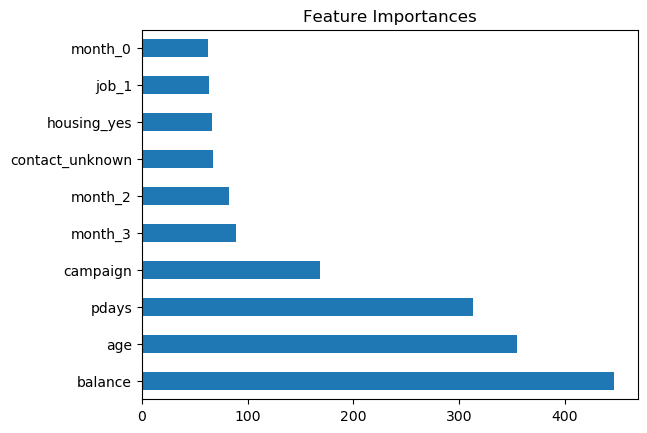

In [ ]:
# Get the names of the transformed features
feature_names = transformer.transformers_[0][1].get_feature_names_out()

# Create a Pandas Series with feature importances and sort it
coef1 = pd.Series(best_model['model'].feature_importances_, cols).sort_values(ascending=False).head(10)

# Plot the feature importances
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

The model's feature importance :

1. **Balance**: The fact that the customer's balance is the most important feature suggests that customers with higher balances are more likely to make a deposit. This makes intuitive sense, as customers with more money in their account might be more financially secure and therefore more likely to save or make deposits.

2. **Age**: The age of a customer being a key feature might indicate a certain age group or groups who are more prone to making deposits. This could potentially help the bank in tailoring their marketing strategies towards these age groups.

3. **Pdays**: The number of days after the client was last contacted from a previous campaign plays a significant role. This might suggest that keeping regular contact with customers or re-engaging with them after certain periods increases the likelihood of them making a deposit.

4. **Campaign**: The number of contacts performed during the current campaign for a client being a critical feature to the model

These insights could be valuable in strategizing marketing efforts and client interaction. By focusing on these key features, XYZ bank could potentially enhance its success in gaining more deposits from customers.

In [ ]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      1019
           1       0.69      0.63      0.66       933

    accuracy                           0.69      1952
   macro avg       0.69      0.69      0.69      1952
weighted avg       0.69      0.69      0.69      1952



- The precision for both classes is 0.69, suggesting that the model correctly identifies potential depositors 69% of the time. Therefore, roughly 31% of customers the model predicts to be potential depositors might not actually deposit. 

- The recall for potential depositors is 0.63, indicating that of all actual depositors in the test set, the model successfully identifies 63% of them. This means about 37% of real depositors may be overlooked.

- The F1-score, a balance of precision and recall, is 0.66 for potential depositors. This suggests a reasonable balance but indicates room for improvement, especially in capturing as many actual depositors as possible (recall).

- The model's accuracy is at 0.69, indicating that 69% of the model's predictions (both depositors and non-depositors) are correct. This, coupled with the other metrics, suggests a decent overall performance but points to potential enhancements in future iterations, particularly in improving the recall for depositors.


In [ ]:
preprocess = best_model[0]

feature_prep = preprocess.transform(x_train)

 98%|===================| 5718/5853 [00:26<00:00]       

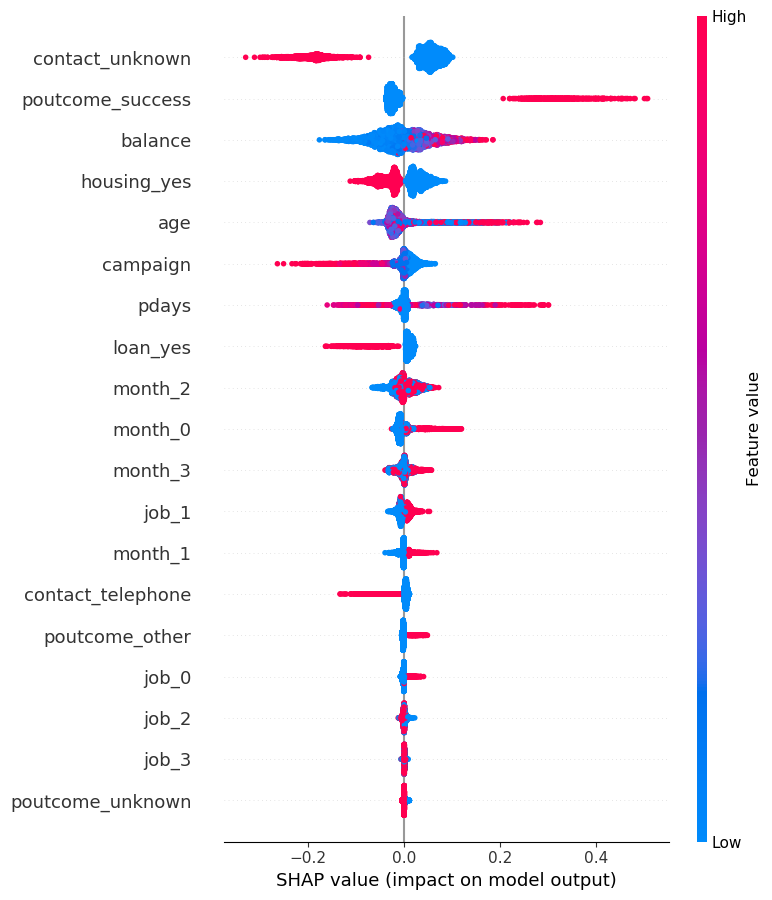

In [ ]:
shap_values = shap.TreeExplainer(best_model.named_steps['model'],
                                 data=feature_prep,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(feature_prep)

shap.summary_plot(shap_values, feature_prep, feature_names = cols)

The SHAP Value provides us with several insightful observations:

1. **poutcome**, the outcome of the previous marketing campaign. The higher the success of the outcome, the greater the likelihood of the customer depositing into XYZ bank.
2. **Age**, the age of the customer. An increase in the customer's age contributes to a higher probability of them making a deposit.
3. **Campaign**, the number of contacts made during this campaign for this client. Interestingly, despite this feature ranking among the top 4 in feature importance, the SHAP value suggests that a higher number actually decreases the likelihood of deposit. This is a surprising insight.
4. **pdays**, the number of days since the client was last contacted from a previous campaign. The SHAP value indicates that a higher number of days increases the probability of the customer making a deposit.

## **Conclusion and Recommendation**

### **Conclusion**

- The classification model has helped us identify key features such as balance, age, pdays, and campaign that influence the likelihood of a customer depositing into XYZ bank. 
- The model performs reasonably well, with a precision of 0.69 and recall of 0.63, though there is room for improvement, especially in terms of recall, to ensure fewer actual depositors are missed.
- Insights from the SHAP values confirm the importance of these features, but interestingly suggest that increasing the number of contacts made during a campaign may actually decrease the likelihood of a deposit, a surprising result that warrants further investigation.
- The customer's balance emerges as a critical factor in the propensity to deposit, indicating that financial security may influence a customer's decision to save or make deposits.
- Customer age, the outcome of previous marketing campaigns (poutcome), and the days since last contact (pdays) also appear to be influential, providing valuable guidance for future marketing efforts.

### **Recommendation**

- **Focus on customer balance**: Since customer balance is a strong indicator of deposit likelihood, the bank could focus its efforts on customers with higher balances, as they are more likely to make deposits. Special offers or targeted marketing campaigns could be deployed for this segment.
- **Age-based targeting**: Given the importance of age in predicting the likelihood of deposits, the bank might consider tailoring its marketing strategies to cater to different age groups more effectively.
- **Monitor frequency of contacts**: Although more frequent contact during a campaign was expected to improve the likelihood of a deposit, the analysis suggests it may actually decrease it. The bank may want to reassess its contact strategy and possibly limit the number of contacts to avoid potential customer fatigue.
- **Leverage successful campaign outcomes**: Since a successful outcome from previous marketing campaigns increases the likelihood of deposits, learning from and repeating successful strategies could be beneficial.
- **Keep regular contact with customers**: The number of days since last contact is an important feature. Regularly reaching out to customers and re-engaging them after certain periods may increase the likelihood of deposits.
- **Enhance model performance**: Efforts should be made to improve the model's recall to capture more actual depositors and improve its overall performance. Additional features, different model architectures, or more advanced techniques could be explored.

Consider the following scenario as a part of our recommendation:

Let's assume the cost of running a marketing campaign to each customer is IDR 140,000 and the revenue from each successful deposit is IDR 1,400,000. 

1. **Focus on customer balance**: Assume we are currently reaching out to 10,000 customers, which costs IDR 1.4 billion. If we refine this approach and focus on customers with higher balances, we might be able to reduce this number to 7,000 without decreasing the number of successful deposits. This would reduce the campaign costs to IDR 980 million, leading to a 30% cost saving or IDR 420 million.

2. **Age-based targeting**: Similarly, if age-based targeting allows us to reduce the number of contacted customers to 6,500, while maintaining the same success rate, we would save 35% in campaign costs, which translates to IDR 490 million.

3. **Monitor frequency of contacts**: Our current strategy might involve contacting customers 5 times during a campaign. But if increasing contact frequency negatively impacts the likelihood of a deposit, we could reduce the number of contacts. If we cut this down to 3 times, assuming the success rate stays the same, we would reduce contact costs by 40%, or approximately IDR 560 million.

4. **Leverage successful campaign outcomes and keep regular contact with customers**: By maintaining regular contact with customers and repeating successful strategies from previous campaigns, we might increase our success rate from 10% to 15%. For the same cost, this could potentially increase our revenues by 50%, or around IDR 700 million.

5. **Enhance model performance**: Improving the model's recall from 63% to 75% could increase the number of identified actual depositors. If this leads to 12% more successful deposits, it would increase our revenues by 12% for the same cost, which would be an additional IDR 168 million.

Note: These are just illustrative examples and the actual numbers may vary depending on the specific costs, revenues, and success rates associated with the bank's marketing campaigns and customers. The currency conversion is approximate and the actual rate may vary.

In [ ]:
# model saving step
import pickle

# saving process
filename = 'Model Final.sav'
pickle.dump(grid_search.best_estimator_,open(filename,'wb'))